In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import torch
from DCGan import Generator
import torchsummary
from PIL import Image

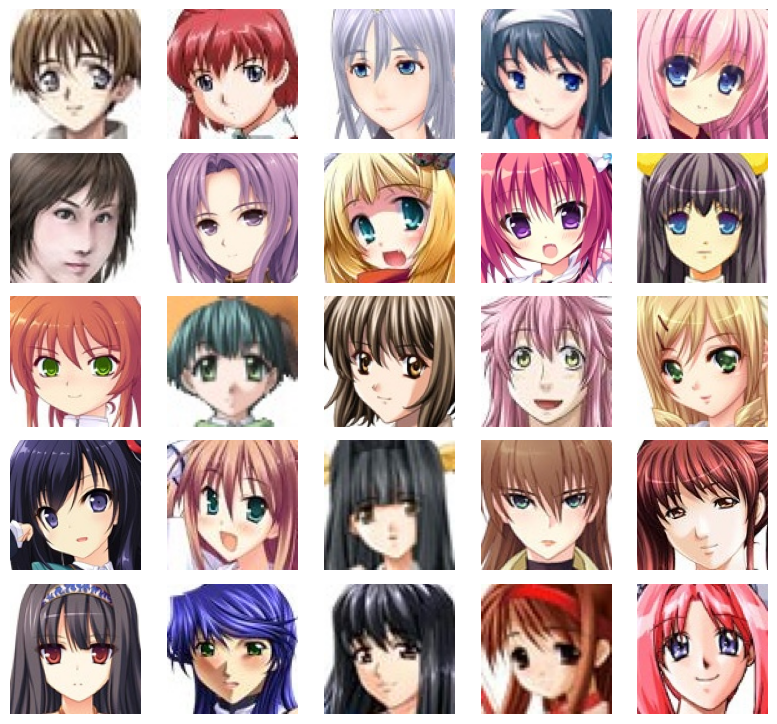

In [3]:
# Generate sample data for demonstration
# Here we create 16 random images of size 10x10

folder = 'huggingface_dataset/data'

paths = os.listdir(folder)
N = len(paths)
file_paths = []
for _ in range(25):
    file_paths.append(paths[random.randint(0, N-1)])
    
images = [np.array(Image.open(os.path.join(folder, path))) for path in file_paths]

# Create a 4x4 grid of images
fig, axs = plt.subplots(5, 5, figsize=(8, 8))

for i in range(5):
    for j in range(5):
        axs[i, j].imshow(images[i * 5 + j])
        axs[i, j].axis('off')  # Hide the axes

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to make space for the title
plt.savefig('grid_of_images.png', bbox_inches='tight')
plt.show()

In [2]:
model_path = "trained_models_300eps/G/Generator_299.pth"

def denorm2(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [3]:
model = Generator()
model = model.to(device)
model.load_state_dict(torch.load(model_path))
model.eval()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20448\1683462241.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): Tanh()
  )
)

In [4]:
torchsummary.summary(model, input_size=(100, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,416
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,136
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,075
             Tanh-14            [-1, 3,

In [5]:
fixed_noise = torch.randn(25, 100, 1, 1, device=device).to(device)
with torch.no_grad():
    fake = model(fixed_noise).detach().cpu()
stats = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
denorm_images = denorm2(fake, *stats)
images = [image.permute(1,2,0) for image in denorm_images]

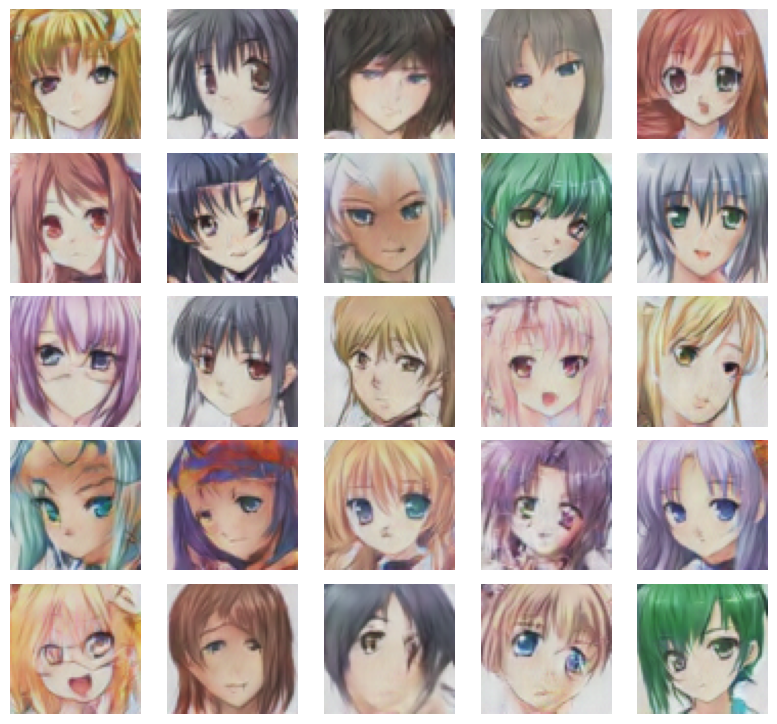

In [6]:
fig, axs = plt.subplots(5, 5, figsize=(8, 8))

for i in range(5):
    for j in range(5):
        axs[i, j].imshow(images[i * 5 + j])
        axs[i, j].axis('off')  # Hide the axes

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to make space for the title
plt.savefig('grid_of_inferred_images_3.png', bbox_inches='tight')
plt.show()